# 목표
* 다양한 그래프 함수들을 사용할 수 있다.
* radius, diameter, center 노드, periphery 노드, clustering coefficient의 의미를 이해하며 사용할 수 있다.
* WCC, SCC, 4가지의 centrality의 의미를 이해하며 실제 데이터(트위터 데이터)를 이용하여 사용할 수 있다.

# 1.총 10개의 그래프를 Generation 하여 각 그래프에 대한 다음을 정리
* 그래프 모습 캡쳐
* radius 값
* diameter 값
* center 노드
* periphery 노드
* 각 노드들에 대한 Clustering Coefficient
* 그래프에 대한 Average Clustering Coefficient



# 용어 설명
* eccentricity : 지정 노드에서 최대 거리
* radius : 모든 노드의 eccentricity 중 최솟값
* diameter : 모든 노드의 eccentricity 중 최댓값
* center  : 네트워크의 radius와 노드의 eccentricity가 같은 노드들 - 중심
* periphery : 네트워크의 diameter와 eccentricity가 같은 노드들 - 외각
* Clustering coefficient : 한 노드의 이웃 노드들 간의 연결 정도. Ci = 1이면 노드 i의 이웃노드들이 서로 연결됨. Ci=0이면 노드 i의 이웃 노드들은 i를 통해서만 연결될 수 있음.

# Classic으로 분류된 그래프
# 1-1. balanced_tree(r,h)
* r : 트리에서 자식 노드의 수
* h : 트리에서 깊이
* 완전 r진 트리

In [163]:
import networkx as nx
import matplotlib.pyplot as plt
import networkx.algorithms as algo
%matplotlib inline

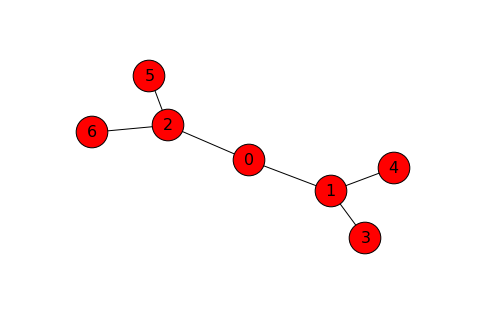

In [164]:
g = nx.balanced_tree(2,2)
nx.draw(g, node_size=1000, with_labels=True, font_size=16)
plt.show()

In [165]:
print "radius(g):", algo.radius(g)
print "diameter(g):", algo.diameter(g)
print "center(g):", algo.center(g)
print "periphery(g):", algo.periphery(g)

radius(g): 2
diameter(g): 4
center(g): [0]
periphery(g): [3, 4, 5, 6]


In [166]:
print "Clustering coefficient : ",nx.clustering(g)
print "Average Clustering coefficient : ", nx.average_clustering(g)

Clustering coefficient :  {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0}
Average Clustering coefficient :  0.0


# 해석
* balanced tree는 r진 완전 트리를 기본구조로 삼기 때문에 각 값들에서 특성이 보인다.
* radius는 최상위 노드와 최하위 노드간의 거리가 된다.
* diameter는 2 x radius가 된다.
* center는 최상위 노드인 0가 된다.
* periphery는 최하위 노드들이 된다.
* 각 노드의 Clustering coefficient는 0이다. 이는 각 노드는 부모 노드와 자손 노드만 연결되어 있고, 부모 노드와 자손 노드는 직접적으로 연결되어 있지않기 때문이다.
* 따라서 평균 Clustering coefficient도 0가 된다.

# 1-2. complete_bipartite_graph(n1,n2)
* n1 : 집합 1
* n2 : 집합 2
* Aij = 1, i는 집합 1의 원소, j는 집합 2의 원소인 그래프

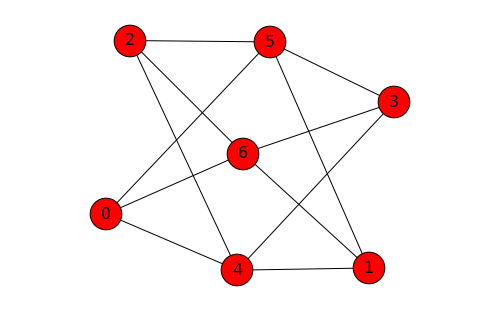

In [167]:
g = nx.complete_bipartite_graph(4,3)
nx.draw(g, node_size=1000, with_labels=True, font_size=16)
plt.show()

In [168]:
print "radius(g):", algo.radius(g)
print "diameter(g):", algo.diameter(g)
print "center(g):", algo.center(g)
print "periphery(g):", algo.periphery(g)

radius(g): 2
diameter(g): 2
center(g): [0, 1, 2, 3, 4, 5, 6]
periphery(g): [0, 1, 2, 3, 4, 5, 6]


In [169]:
print "Clustering coefficient : ",nx.clustering(g)
print "Average Clustering coefficient : ", nx.average_clustering(g)

Clustering coefficient :  {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0}
Average Clustering coefficient :  0.0


# 해석
* complete_bipartite_graph는 집합1과 집합2의 완전 연결이기 때문에 집합 1의 원소와 집합 2의 원소의 거리는 1이고, 같은 집합 내의 원소의 거리는 다른 집합을 거쳐 와야 하기 때문에 2이다.
* 따라서 각 노드의 eccentricity는 2이며 이로 인해 radius와 diameter는 2가 된다.
* 모든 노드의 eccentricity가 radius와 같으므로 모든 노드들이 center이자 periphery가 된다.
* 한 노드의 이웃 노드들은 다른 집합인데, 이 이웃노드들은 같은 집합으로 서로 연결되어 있지 않다.
* 따라서 Clustering coefficient와 Average Clustering coefficient가 0가 된다.

# 1.3 wheel_graph(n)
* n: 주변 노드의 수
* 0 노드를 중심으로 n개의 노드와 연결되어 있고 각 노드는  2개의 이웃노드와 연결되어 있음

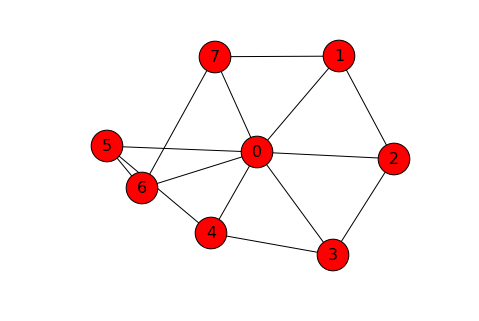

In [170]:
g = nx.wheel_graph(8)
nx.draw(g, node_size=1000, with_labels=True, font_size=16)
plt.show()

In [171]:
print "radius(g):", algo.radius(g)
print "diameter(g):", algo.diameter(g)
print "center(g):", algo.center(g)
print "periphery(g):", algo.periphery(g)

radius(g): 1
diameter(g): 2
center(g): [0]
periphery(g): [1, 2, 3, 4, 5, 6, 7]


In [172]:
print "Clustering coefficient : ",nx.clustering(g)
print "Average Clustering coefficient : ", nx.average_clustering(g)

Clustering coefficient :  {0: 0.3333333333333333, 1: 0.6666666666666666, 2: 0.6666666666666666, 3: 0.6666666666666666, 4: 0.6666666666666666, 5: 0.6666666666666666, 6: 0.6666666666666666, 7: 0.6666666666666666}
Average Clustering coefficient :  0.625


# 해석
* 노드 0는 모든 노드와 연결되어 있기 때문에 radius가 1이 된다.
* 노드 0를 제외한 노드들은 이웃 노드들을 제외한 나머지 노드와의 eccentricity가 2이기 때문에 diameter는 2가 된다.
* 네트워크가 노드 0를 중심으로 한 네트워크이기 때문에 center는 0가 된다.
* periphery는 노드 0를 제외한 나머지 노드가 된다.
* Clustering coefficient는 중심 노드인 노드 0를 제외하고 모두 같다.

# 1.4 star_graph(n)
* n : 가운데 노드를 제외한 노드의 수
* 각 노드는 중심 노드와만 연결되어 있음

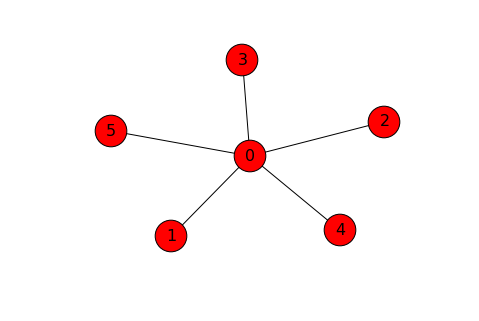

In [173]:
g = nx.star_graph(5)
nx.draw(g, node_size=1000, with_labels=True, font_size=16)
plt.show()

In [174]:
print "radius(g):", algo.radius(g)
print "diameter(g):", algo.diameter(g)
print "center(g):", algo.center(g)
print "periphery(g):", algo.periphery(g)

radius(g): 1
diameter(g): 2
center(g): [0]
periphery(g): [1, 2, 3, 4, 5]


In [175]:
print "Clustering coefficient : ",nx.clustering(g)
print "Average Clustering coefficient : ", nx.average_clustering(g)

Clustering coefficient :  {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0}
Average Clustering coefficient :  0.0


# 해석
* 노드 0는 모든 노드와 연결되어 있기 때문에 노드 0의 eccentricity가 1 이므로 radius가 1이 된다.
* 노드 0를 제외한 노드들은 eccentricity가 2이기 때문에 diameter는 2가 된다.
* 네트워크가 노드 0를 중심으로 한 네트워크이기 때문에 center는 노드 0이 된다.
* periphery는 노드 0를 제외한 나머지 노드가 된다.
* 중신 노드를 제외하면 연결되어 있지 않기 때문에 Clustering coefficient는 0이다.

# 1.5 path_graph(dim)
* dim = [a,b] : 2차원에서 a x b 그리드로 이루어진 그래프

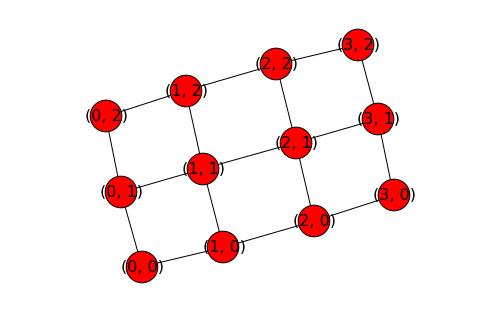

In [176]:
g = nx.grid_graph(dim=[4,3])
nx.draw(g, node_size=1000, with_labels=True, font_size=16)
plt.show()

In [177]:
print "radius(g):", algo.radius(g)
print "diameter(g):", algo.diameter(g)
print "center(g):", algo.center(g)
print "periphery(g):", algo.periphery(g)

radius(g): 3
diameter(g): 5
center(g): [(2, 1), (1, 1)]
periphery(g): [(3, 2), (0, 0), (3, 0), (0, 2)]


In [178]:
print "Clustering coefficient : ",nx.clustering(g)
print "Average Clustering coefficient : ", nx.average_clustering(g)

Clustering coefficient :  {(0, 1): 0.0, (1, 2): 0.0, (3, 2): 0.0, (0, 0): 0.0, (3, 0): 0.0, (3, 1): 0.0, (2, 1): 0.0, (1, 1): 0.0, (2, 0): 0.0, (2, 2): 0.0, (1, 0): 0.0, (0, 2): 0.0}
Average Clustering coefficient :  0.0


# 해석
* radius는 입력되는 dim=[a,b]의 크기에 따라 달라지며 (a+b)/2의 몫이 된다. 예시는 [4,3]이므로 7/2의 몫인 3이 radius가 된다.
* diameter는 (a-1)+(b-1)이 된다.
* center는 그리드의 중심이 된다.
* periphery는 그리드의 꼭지점 4개이다.
* 대각선으로 연결된 노드들이 없기 때문에 Clustering coefficient는 0이다.

# Random으로 분류된 그래프
# 1.6 random_lobster(n, p1, p2)
* n : 예상되는 backbone의 수
* p1 : backbone에 엣지를 연결할 확률
* p2 : backbone 다음 단계에 엣지를 연결할 확률

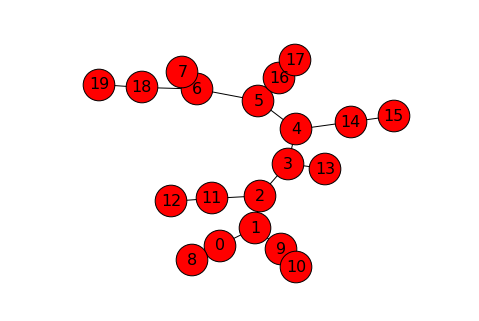

In [179]:
g = nx.random_lobster(5, 0.8 , 0.7)
nx.draw(g, node_size=1000, with_labels=True, font_size=16)
plt.show()

In [180]:
print "radius(g):", algo.radius(g)
print "diameter(g):", algo.diameter(g)
print "center(g):", algo.center(g)
print "periphery(g):", algo.periphery(g)

radius(g): 5
diameter(g): 9
center(g): [3, 4]
periphery(g): [8, 10, 19]


In [181]:
print "Clustering coefficient : ",nx.clustering(g)
print "Average Clustering coefficient : ", nx.average_clustering(g)

Clustering coefficient :  {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.0}
Average Clustering coefficient :  0.0


# 해석
* p1과 p2를 조절하여 테스트해보았지만 특정 규칙을 찾지 못하였다. p1을 고정 상태에서 p2를 낮추었지만 노드수가 줄어든 경우도 있었다.
* 따라서 radius와 diameter의 규칙을 찾지 못하였다.
* center는 backbone 노드들 중에서 선택되는 경향이 있다.
* periphery는 backbone과 연결된 노드들 중에서 가장 깊이가 깊은 노드들이다.
* backbone을 기준으로 연결되어 있기 때문에 Clustering coefficient는 0이다.

# 1.7 connected_watts_strogatz_graph(n, k, p, tries=100)
* n : 노드의 수
* k : 각 노드와 연결된 가장 인접한 노드의 수
* p : 각 간선을 재배치할 확률
* tries : 연결된 그래프 생성을 위한 시도 횟수

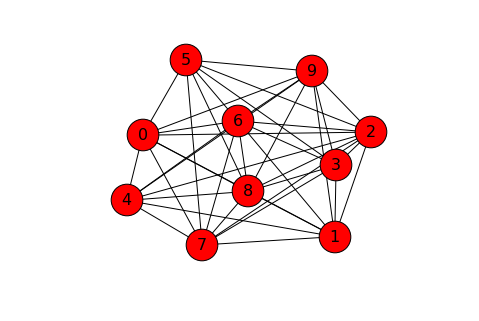

In [182]:
g = nx.connected_watts_strogatz_graph(10, 8,0.3,10)
nx.draw(g, node_size=1000, with_labels=True, font_size=16)
plt.show()

In [183]:
print "radius(g):", algo.radius(g)
print "diameter(g):", algo.diameter(g)
print "center(g):", algo.center(g)
print "periphery(g):", algo.periphery(g)

radius(g): 1
diameter(g): 2
center(g): [2, 6, 8]
periphery(g): [0, 1, 3, 4, 5, 7, 9]


In [184]:
print "Clustering coefficient : ",nx.clustering(g)
print "Average Clustering coefficient : ", nx.average_clustering(g)

Clustering coefficient :  {0: 0.8928571428571429, 1: 0.8928571428571429, 2: 0.8611111111111112, 3: 0.9047619047619048, 4: 0.9523809523809523, 5: 0.9047619047619048, 6: 0.8611111111111112, 7: 0.8571428571428571, 8: 0.8611111111111112, 9: 0.8571428571428571}
Average Clustering coefficient :  0.884523809524


# 해석
* 이 그래프는 한 노드의 최대 간선 수 k에 영향을 받는다.
* k가 클수록 radius, diameter는 감소하고 Clustering coefficient는 증가한다.
* 또한 center의 수가 증가하며 k가 n-1일 때에는 center와 periphery가 같아지는 경우도 있다.

# 1.8 dense_gnm_random_graph(n, m)
* n : 노드의 수
* m : 간선의 수

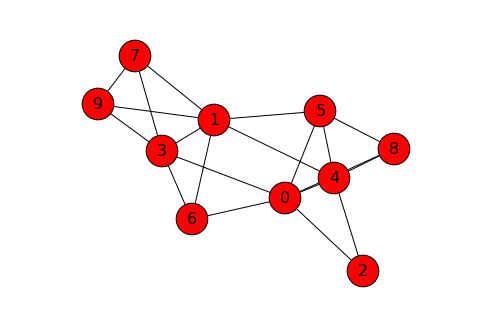

In [185]:
g = nx.dense_gnm_random_graph(10,20)
nx.draw(g, node_size=1000, with_labels=True, font_size=16)
plt.show()

In [186]:
print "radius(g):", algo.radius(g)
print "diameter(g):", algo.diameter(g)
print "center(g):", algo.center(g)
print "periphery(g):", algo.periphery(g)

radius(g): 2
diameter(g): 3
center(g): [0, 1, 3, 4, 5, 6]
periphery(g): [2, 7, 8, 9]


In [187]:
print "Clustering coefficient : ",nx.clustering(g)
print "Average Clustering coefficient : ", nx.average_clustering(g)

Clustering coefficient :  {0: 0.3333333333333333, 1: 0.3333333333333333, 2: 1.0, 3: 0.5, 4: 0.5, 5: 0.6666666666666666, 6: 0.6666666666666666, 7: 1.0, 8: 1.0, 9: 1.0}
Average Clustering coefficient :  0.7


# 해석
* 이 그래프도 간선의 수 m에 영향을 받는다.
* 따라서 m이 커질수록 대채로 radius와 diameter가 작아진다.(간선수가 적은 상황에서는 간선수가 증가하더라도 생성된 case에 따라 달라지진다.)
* 한 노드에서 많은 간선이 나오는 것이 아니라 대체적으로 균형을 이루려 하기 때문에 center와 periphery가 다수이다.
* Clustering coefficient는 간선의 수에 영향을 많이 받는다.

# 1.9 random_powerlaw_tree(n, gamma=3, tries=100)
* n : 노드의 수
* gamma : 지수법칙에서 지수(2.6~3.1)
* tries : 트리를 만들기 위해 순서를 조정하는 횟수

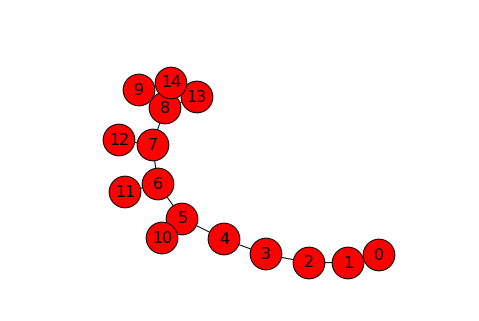

In [188]:
g = nx.random_powerlaw_tree(15, gamma=3, tries=200)
nx.draw(g, node_size=1000, with_labels=True, font_size=16)
plt.show()

In [189]:
print "radius(g):", algo.radius(g)
print "diameter(g):", algo.diameter(g)
print "center(g):", algo.center(g)
print "periphery(g):", algo.periphery(g)

radius(g): 5
diameter(g): 9
center(g): [4, 5]
periphery(g): [0, 9, 13, 14]


In [190]:
print "Clustering coefficient : ",nx.clustering(g)
print "Average Clustering coefficient : ", nx.average_clustering(g)

Clustering coefficient :  {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0}
Average Clustering coefficient :  0.0


# 해석
* 트리 구조이기 때문에 Clustering coefficient는 0가 된다.
* 또한 radius와 diameter는 노드 수에 영향을 받는다.
* periphery는 트리의 끝과 끝노드이다.

# 1.10 random_shell_graph(constructor)
* constructor : 3개의 터플로 이루어진 리스트 (n,m,d)
* n : 쉘에서 노드의 수
* m : 쉘에서 간선의 수 
* d : 쉘 사이의 연결 비율

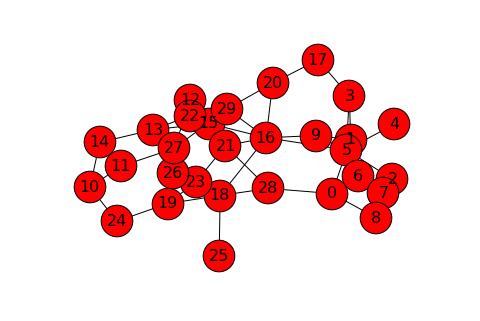

In [194]:
constructor=[(10,20,0.8),(20,40,0.8)]
g = nx.random_shell_graph(constructor)
nx.draw(g, node_size=1000, with_labels=True, font_size=16)
plt.show()

In [195]:
print "radius(g):", algo.radius(g)
print "diameter(g):", algo.diameter(g)
print "center(g):", algo.center(g)
print "periphery(g):", algo.periphery(g)

radius(g): 3
diameter(g): 6
center(g): [18]
periphery(g): [1, 2, 3, 4, 6, 7, 8, 10, 11, 14]


In [196]:
print "Clustering coefficient : ",nx.clustering(g)
print "Average Clustering coefficient : ", nx.average_clustering(g)

Clustering coefficient :  {0: 0.16666666666666666, 1: 0.4, 2: 0.6666666666666666, 3: 0.3333333333333333, 4: 0.0, 5: 0.17857142857142858, 6: 0.6666666666666666, 7: 0.6666666666666666, 8: 0.3333333333333333, 9: 0.6666666666666666, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0, 16: 0.09523809523809523, 17: 0.0, 18: 0.06666666666666667, 19: 0.3333333333333333, 20: 0.3333333333333333, 21: 0.0, 22: 0.0, 23: 0.3333333333333333, 24: 0.0, 25: 0.0, 26: 0.0, 27: 0.06666666666666667, 28: 0.0, 29: 0.16666666666666666}
Average Clustering coefficient :  0.18246031746


#해석
* radius와 diameter, center, periphery는 d에 영향을 많이 받는다.
* d가 높을수록 radius, diameter가 낮아진다.

# 2.Twitter 소셜 그래프 특성 분석
* 총 노드의 수
* 총 간선의 수
* Average clustering coefficient
* Radius & Diameter
* 최대 WCC안의 총 노드의 수
* 최대 WCC안의 총 간선의 수
* 최대 SCC안의 총 노드의 수
* 최대 SCC안의 총 간선의 수
* Top 10 Nodes of Degree Centrality
* Top 10 Nodes of Closeness Centrality
* Top 10 Nodes of Betweenness Centrality
* Top 10 Nodes of Eigenvector Centrality

In [197]:
import os
import networkx as nx
import matplotlib.pyplot as plt
import operator

facebookPath = 'C:\Users\stajun\Downloads\Data_Science\\twitter'
edgeFiles = []

for fileName in os.listdir(facebookPath):
    if fileName.endswith('.edges'):
        edgeFiles.append(os.path.join(facebookPath, fileName))

* .edges 파일 이름들을 저장한다.

In [198]:
def sort_map(map):
	sortedList = map.items()
	sortedList.sort(key=operator.itemgetter(1), reverse=True)
	return sortedList

* centrality가 높은 노드들을 알아보기 위한 정렬 함수

* 방향 그래프 dg를 생성 후 edges 파일을 하나씩 불러와 불러운 파일로 방향 그래프 tmp를 생성한다.
* 생성한 tmp 그래프의 edge들을 dg 그래프에 추가해준다.

In [199]:
dg=nx.DiGraph()
for i in range(0,50):
    tmp = nx.read_edgelist(edgeFiles[i],create_using=nx.DiGraph())
    dg.add_edges_from((tmp.edges()))

# 노드와 간선의 수
* 저장된 dg가 전체 트위터(제공된) 그래프이므로 dg의 노드 수와 간선 수를 계산한다.
* 출력된 노드의 수와 간선의 수를 계산했지만 홈페이지에서 제공된 내용과 다르다.
* 973개의 네트워크로 비교하려했으나 Centrality를 계산하는 시간으로 인해 100개의 네트워크를 연결하였다.

In [200]:
print "Number of node : ", dg.number_of_nodes()
print "Number of edges: ", dg.number_of_edges()

Number of node :  5587
Number of edges:  103134


# Average clustering coefficient와 Radius & Diameter
* 평균 클러스터링 효율과 radius, diameter를 계산하기 위해 방향성 그래프를 무방향성 그래프로 변환한다.
* 방향성 그래프의 경우 eccentricity를 계산할 수 없기 때문이다.
* 하지만 e를 계산 도중에 다음과 같은 에러가 났다.
* 이는 특정 노드들이 다른 노드와 연결되어있지 않을 경우 eccentricity가 무한대가 되어 나타나는 현상이다

In [201]:
acc = dg.to_undirected()

e = nx.eccentricity(acc)

# 최대 SCC의 총 노드수와 간선 수
* strongly_connected_component_subgraphs 함수를 이용하여 dg에서 각 서브 SCC를 구한다.
* 이 중 최대가 되는 SCC를 저장하여 노드수와 간선 수를 구한다.

In [202]:
scc = max(nx.strongly_connected_component_subgraphs(dg), key=len)

In [203]:
print "Number of node : ", scc.number_of_nodes()
print "Number of edges: ", scc.number_of_edges()

Number of node :  4259
Number of edges:  88143


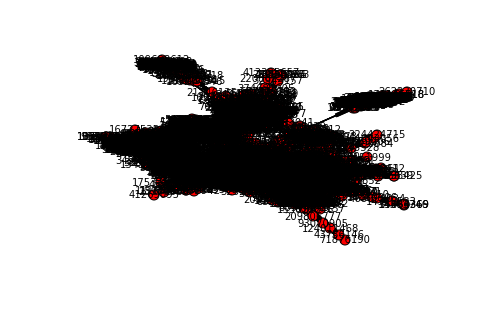

In [213]:
nx.draw(scc, node_size=100, with_labels=True, font_size=10)
plt.show()

# 최대 WCC의 총 노드수와 간선 수
* weakly_connected_component_subgraphs 함수를 이용하여 dg에서 각 서브 WCC를 구한다.
* 이중 최대가 되는 WCC를 저장하여 노드수와 간선수를 구한다.
* 전체 그래프 dg의 전체 노드수/간선수와 최대 WCC의 총 노드수와 간선수가 일치하지 않는다.
* 즉 연결이 되지 않는 노드가 있거나 두개 이상의 단절된 그룹들이 존재하고 이로 인해 eccentricity를 계산할 수 없다.

In [204]:
wcc = max(nx.weakly_connected_component_subgraphs(dg), key=len)

In [205]:
print "Number of node : ", wcc.number_of_nodes()
print "Number of edges: ", wcc.number_of_edges()

Number of node :  5226
Number of edges:  95350


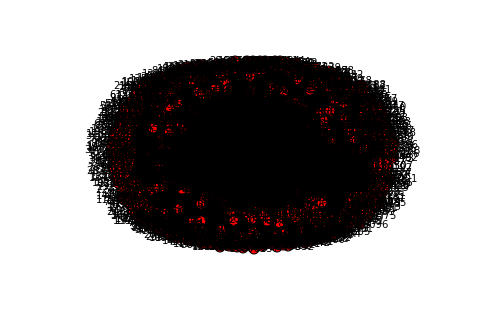

In [212]:
nx.draw(wcc, node_size=100, with_labels=True, font_size=10)
plt.show()

# Top 10 Nodes of Degree Centrality
* 제공되는 함수를 이용하여 각 노드의 degree centrality를 계산한다.
* degree centrality가 높은 순으로 정렬하여 상위 10개 노드를 출력한다.

In [206]:
degree_centrality = nx.degree_centrality(dg)
sorted_degree_centrality = sort_map(degree_centrality)
print sorted_degree_centrality[:10]

[(u'3359851', 0.08199069101324741), (u'5442012', 0.08145363408521304), (u'48485771', 0.07608306480486932), (u'40981798', 0.06856426781238811), (u'43003845', 0.06480486931614751), (u'15913', 0.059613319011815255), (u'59804598', 0.05728607232366631), (u'16098603', 0.05621195846759757), (u'22462180', 0.05531686358754028), (u'34428380', 0.05495882563551737)]


# Top 10 Nodes of Betweenness Centrality 
* 제공되는 함수를 이용하여 각 노드의 Betweenness centrality를 계산한다.
* Betweenness centrality가 높은 순으로 정렬하여 상위 10개 노드를 출력한다.

In [208]:
bet_centrality = nx.betweenness_centrality(dg)
sorted_bet_centrality =sort_map(bet_centrality)
print sorted_bet_centrality[:10]

[(u'17093617', 0.08313263540417469), (u'14994465', 0.07580073109575088), (u'3359851', 0.07366363452555277), (u'59804598', 0.06735393548725159), (u'15666380', 0.06665250660835245), (u'41716273', 0.061366635243935194), (u'10671602', 0.059866658188649106), (u'48485771', 0.059756216040628696), (u'813286', 0.05788529591369688), (u'40981798', 0.044971501942897604)]


# Top 10 Nodes of Eigenvector Centrality 
* 제공되는 함수를 이용하여 각 노드의 Eigenvector centrality를 계산한다.
* Eigenvector centrality가 높은 순으로 정렬하여 상위 10개 노드를 출력한다.

In [209]:
eigenvector_centrality = nx.eigenvector_centrality(dg)
sorted_eigenvector_centrality= sort_map(eigenvector_centrality)
print sorted_eigenvector_centrality [:10]

[(u'40981798', 0.19539980197580495), (u'22462180', 0.1901292452650122), (u'34428380', 0.1889309418931713), (u'43003845', 0.18709375206838819), (u'17868918', 0.15847915205560925), (u'31331740', 0.14472033898665312), (u'27633075', 0.1432972567788869), (u'18996905', 0.14328911810388173), (u'8088112', 0.14227340516081513), (u'151338729', 0.13488966977881311)]


# Top 10 Nodes of Closeness Centrality 
* 제공되는 함수를 이용하여 각 노드의 Closeness centrality를 계산한다.
* Closeness centrality가 높은 순으로 정렬하여 상위 10개 노드를 출력한다.

In [210]:
closeness_centrality = nx.closeness_centrality(dg)
sorted_closeness_centrality = sort_map(closeness_centrality)
print sorted_closeness_centrality [:10]

[(u'3359851', 0.23525631348701168), (u'18581803', 0.21868520012227954), (u'20273398', 0.2161457508566652), (u'17759701', 0.2133147951549249), (u'5442012', 0.21314594439358853), (u'48485771', 0.21288755843875526), (u'10671602', 0.21270818085515317), (u'59804598', 0.21196030889265863), (u'17552077', 0.21152739702846313), (u'7860742', 0.20945424425733786)]


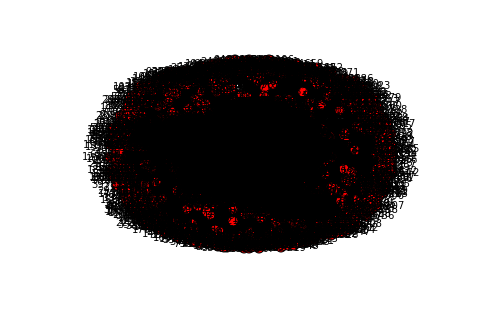

In [211]:
nx.draw(dg, node_size=100, with_labels=True, font_size=10)
plt.show()

# 결론
* 이번 실험은 SNAP에서 제공하는 데이터를 이용하여 Python을 이용하여 작성하였습니다. 전체 데이터로 했을 경우 SNAP에서 제공하는 결과가 같지 않았고(이유를 찾지 못함), 3가지의 Centrality(degree제외)를 구하는데 시간이 오래 걸려 전체 네트워크가(973)이 아닌 (100)의 네트워크를 연결하여 테스트 해보았습니다. 
* 네트워크의 크기가 크다 보니 테스트 하는 네트워크가 제대로 연결된 네트워크인지 알 수 없었습니다. 예로 전체 네트워크를 연결했을 경우 WCC의 노드수와 간선수가 전체 네트워크의 노드수와 간선수와 일치해야하는데 일치하지 않았습니다. 이는 단절된 네트워크가 있다는 것을 의미하며 이로 인해 eccentricity를 구할 수 없었습니다.
* 통계 내용들(회귀 분석)이 나와서 어려웠었지만 세세한 내용(수식 등)이 아닌 사용하는 목적을 이해하면 되어 다행이었습니다.
* 수업을 이론만 했을 경우 실제 데이터가 주었을 때 어떻게 분석할지 어려웠을텐데 실습과 함께 이루어져 이해하기 쉬웠습니다.
* 하지만 마지막 과제가 확인하는데 시간이 오래 걸리고 기본 사용방법이 나와있지 않아 어려웠습니다.